# Penarikan Kesimpulan dan Pengujian Hipotesis
Tugas Besar IF2220 Probabilitas dan Statistika 

## Anggota
1. M. Athaullah Daffa Kusuma M (13522044)
2. Christopher Brian (13522106) 

## Enam Langkah Testing:
1. Tentukan Hipotesis nol (H0: θ = θ0), dimana θ bisa berupa μ, σ2, p, atau data lain berdistribusi tertentu (normal, binomial, dsc.). 
2. Pilih hipotesis alternatif H1 salah dari dari θ > θ0, θ < θ0, atau θ ≠ θ0. 
3. Tentukan tingkat signifikan α.
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis. 
5. Hitung nilai uji statistik dari data sample. Hitung p-value sesuai dengan uji statistik yang digunakan. 
6. Ambil keputusan dengan TOLAK H0 jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi α yang diinginkan 

# Header and Loading Dataset to Variable


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

# database murni
databasenya = pd.read_csv('banana.csv')

# database without number
databasenya1 = databasenya.loc[:, 'Acidity':'Price']

# database numeric only
numeric_columns = databasenya1.select_dtypes(include=[np.number]).columns
databasenumeric = databasenya1.loc[:, numeric_columns]

#database string only
string_columns = databasenya1.select_dtypes(include=['object']).columns
databasestring = databasenya1.loc[:, string_columns]

# 1. Deskripsi Statistika (Descriptive Statistics)

## Penjelasan Atribut
- Count     : Jumlah Data
- Mean      : Rata-rata Data
- Std       : Standar Deviasi, untuk melihat seberapa jauh atau seberapa dekat nilai data dengan rata-ratanya.
- Min       : Nilai Minimal
- Max       : Nilai Maksimal
- 25%       : Kuartil Pertama
- 50%       : Kuartil kedua (Median)
- 75%       : Kuartil ketiga
- Modus     : Nilai yang paling sering muncul
- Variansi  : Seberapa jauh penyebaran data dari nilai rata-ratanya
- Range     : Selisih antara nilai terbesar dan terkecil
- IQR       : Selisih antara kuartil atas dan kuartil bawah
- Skewness  : Kemiringan distribusi data
- Kurtosis  : Derajat kepuncakan 


In [80]:
data_DesStat = databasenumeric.describe(include=[np.number])
data_DesStat.loc['modus'] = databasenumeric.mode().iloc[0]
data_DesStat.loc['variansi'] = databasenumeric.var()
data_DesStat.loc['range'] = data_DesStat.loc['max'] - data_DesStat.loc['min']
data_DesStat.loc['IQR'] = data_DesStat.loc['75%'] - data_DesStat.loc['25%']
data_DesStat.loc['skewness'] = databasenumeric.skew()
data_DesStat.loc['kurtosis'] = databasenumeric.kurt()
data_DesStat

,Acidity,Weight,Length,Appearance,Tannin,Ripeness,Sweetness,Firmness,Price
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,8.014830,150.011549,49.950434,4.965595,7.965435,6.743434,6.226319,0.507790,19969.669241
std,1.105781,1.194980,0.894599,1.014863,1.217188,0.680320,0.662980,0.292226,777.347464
min,4.456118,146.060922,46.418052,1.775864,4.291274,4.862560,3.033193,0.000254,-1.000000
25%,7.259942,149.227116,49.346508,4.258210,7.167241,6.268258,5.808028,0.254351,19953.093529
50%,8.005347,150.022865,49.923682,4.979534,8.022448,6.667618,6.312819,0.515483,19999.508312
75%,8.758361,150.827613,50.572027,5.653875,8.792184,7.164813,6.714660,0.758786,20047.301949
max,11.418636,154.070370,53.065151,8.233968,12.416177,9.482066,7.678689,2.000000,20281.431062
modus,4.456118,146.060922,46.418052,1.775864,4.291274,4.862560,3.033193,0.000254,0.000000
variansi,1.222752,1.427977,0.800307,1.029946,1.481546,0.462836,0.439543,0.085396,604269.080280


# 2. Outlier Pada Data

Untuk dapat mengetahui apakah terdapat outlier, digunakan metode melihat boxplot.

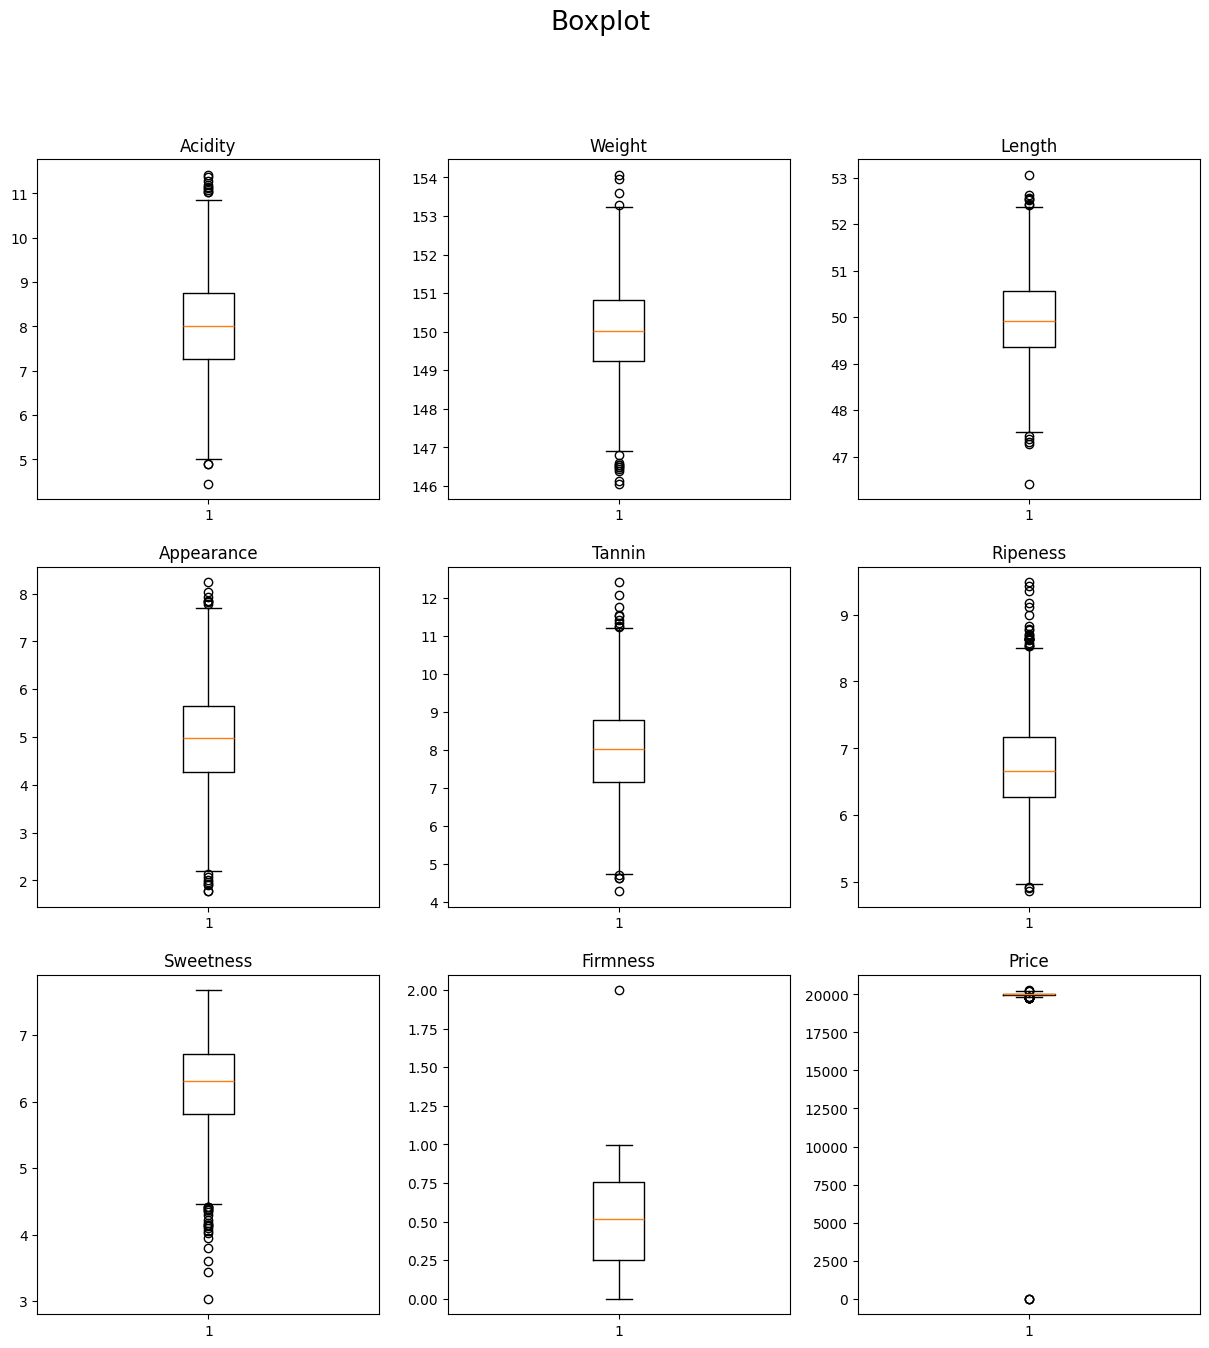

In [81]:
fig, ax = plt.subplots(3,3,figsize=(15,15))
fig.suptitle('Boxplot', fontsize=19)
for i in range(3):
    for j in range(3):
        ax[i, j].boxplot(databasenumeric[databasenumeric.columns[i*3+j]])
        ax[i, j].set_title(databasenumeric.columns[i*3+j])

plt.show()

Berdasarkan boxplot di atas, kolom acidity, weight, length, appearance, tannin, ripeness, dan price memiliki outlier yang melewati batas atas dan batas bawah. Sedangkan kolom sweetness memiliki outlier yang melewati batas bawah dan kolom firmness memiliki outlier yang melewati batas atas.

Untuk menangani outlier ini, salah satu teknik umum untuk menangani outlier ini yaitu pemangkasan. Pemangkasan merupakan penghapusan data outlier tersebut dari dataset tersebut. Selain itu, juga dapat dilakukan Winsorizing pada data tersebut, yaitu mengganti nilai outlier tersebut dengan nilai persentil tertentu dalam rentang tertentu.

Kita akan melakukan winsorizing dimana kita akan mereplace data tersebut menjadi Upper_whisker jika data tersebut di atas Upper_whisker, dan mereplace data tersebut menjadi Lower_whisker jika data tersebut di atas Lower_whisker.

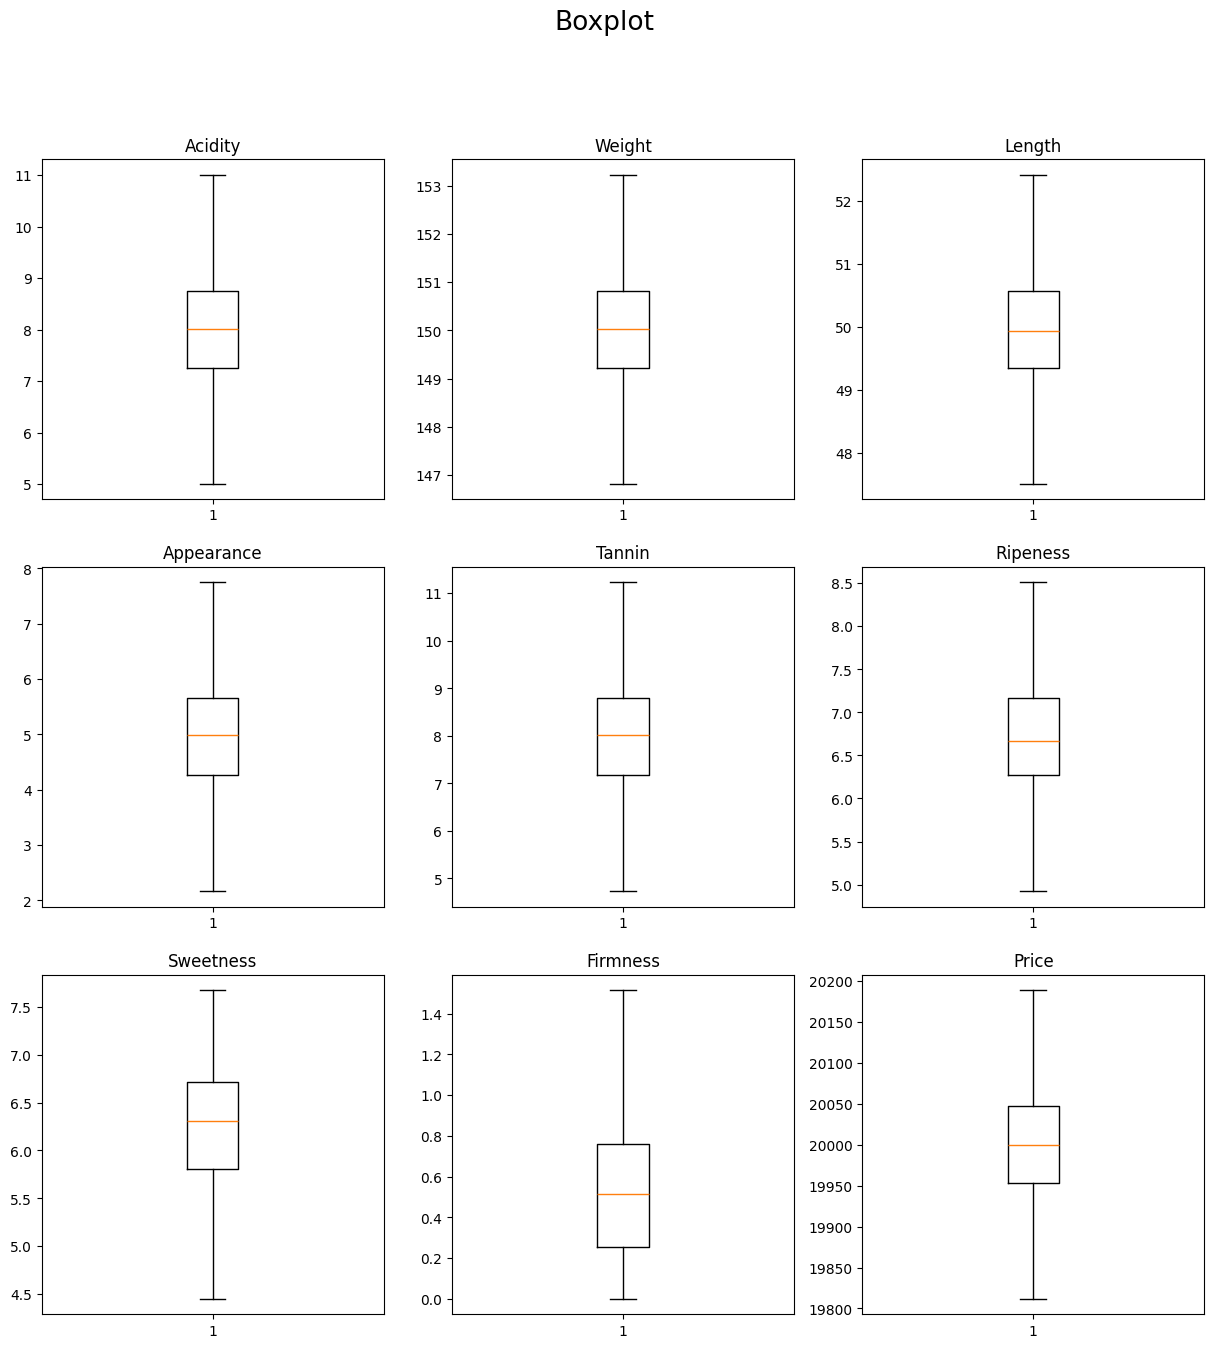

In [16]:
databaseNonOutlier = pd.DataFrame(databasenumeric)

for i in list(databaseNonOutlier.columns):
    Q1 = databaseNonOutlier[i].quantile(0.25)
    Q3 = databaseNonOutlier[i].quantile(0.75)
    IQR = Q3-Q1
    Lower_whisker = Q1 - 1.5 * IQR
    Upper_whisker = Q3 + 1.5 * IQR
    databaseNonOutlier[i].values[databaseNonOutlier[i].values <= Lower_whisker] = Lower_whisker
    databaseNonOutlier[i].values[databaseNonOutlier[i].values >= Upper_whisker] = Upper_whisker
    
fig, ax = plt.subplots(3,3,figsize=(15,15))
fig.suptitle('Boxplot', fontsize=19)
for i in range(3):
    for j in range(3):
        ax[i, j].boxplot(databaseNonOutlier[databaseNonOutlier.columns[i*3+j]])
        ax[i, j].set_title(databaseNonOutlier.columns[i*3+j])

plt.show()


Dilihat dari boxplot yang baru, kita berhasil menghapus data-data outlier dengan melakukan Winsorizing.

# 3. Visualisasi Plot Distribusi

Untuk kolom numerik akan dibuat dalam bentuk boxplot dan histogram. Sementara kolom string dibuat hanya dalam bentuk histogram. 

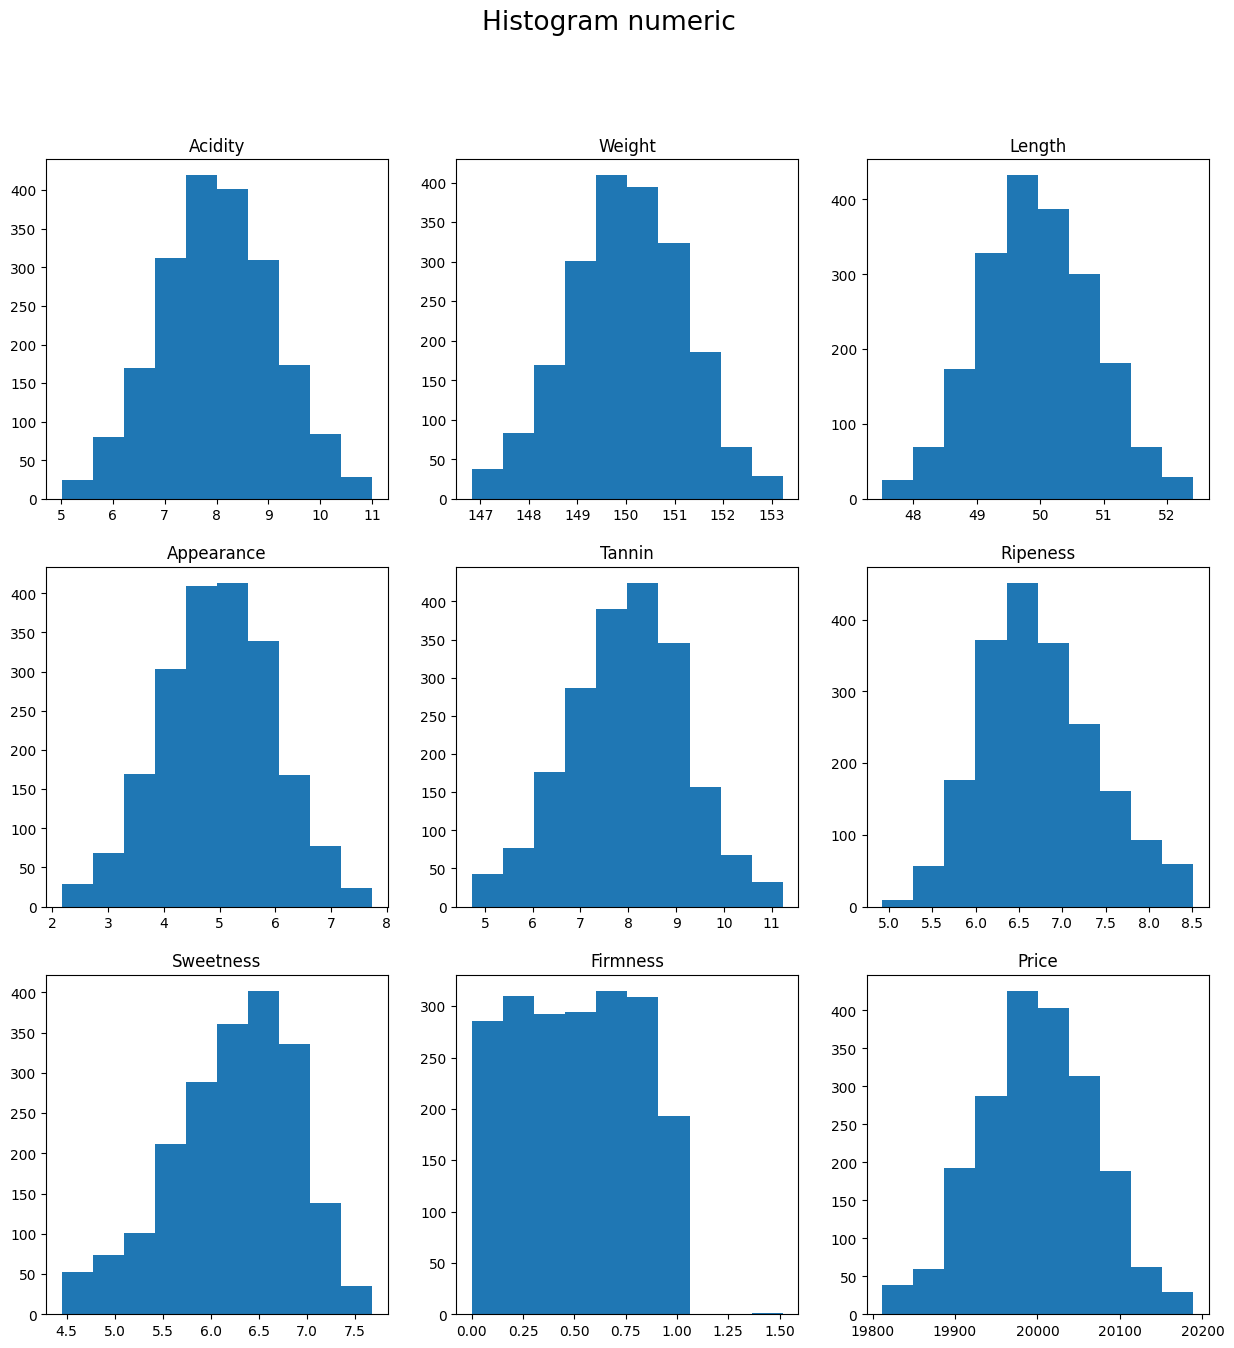

In [17]:
# Histogram numeric
fig, ax = plt.subplots(3,3,figsize=(15,15))
fig.suptitle('Histogram numeric', fontsize=19)
for i in range(3):
    for j in range(3):
        ax[i, j].hist(databaseNonOutlier[databaseNonOutlier.columns[i*3+j]])
        ax[i, j].set_title(databaseNonOutlier.columns[i*3+j])

plt.show()

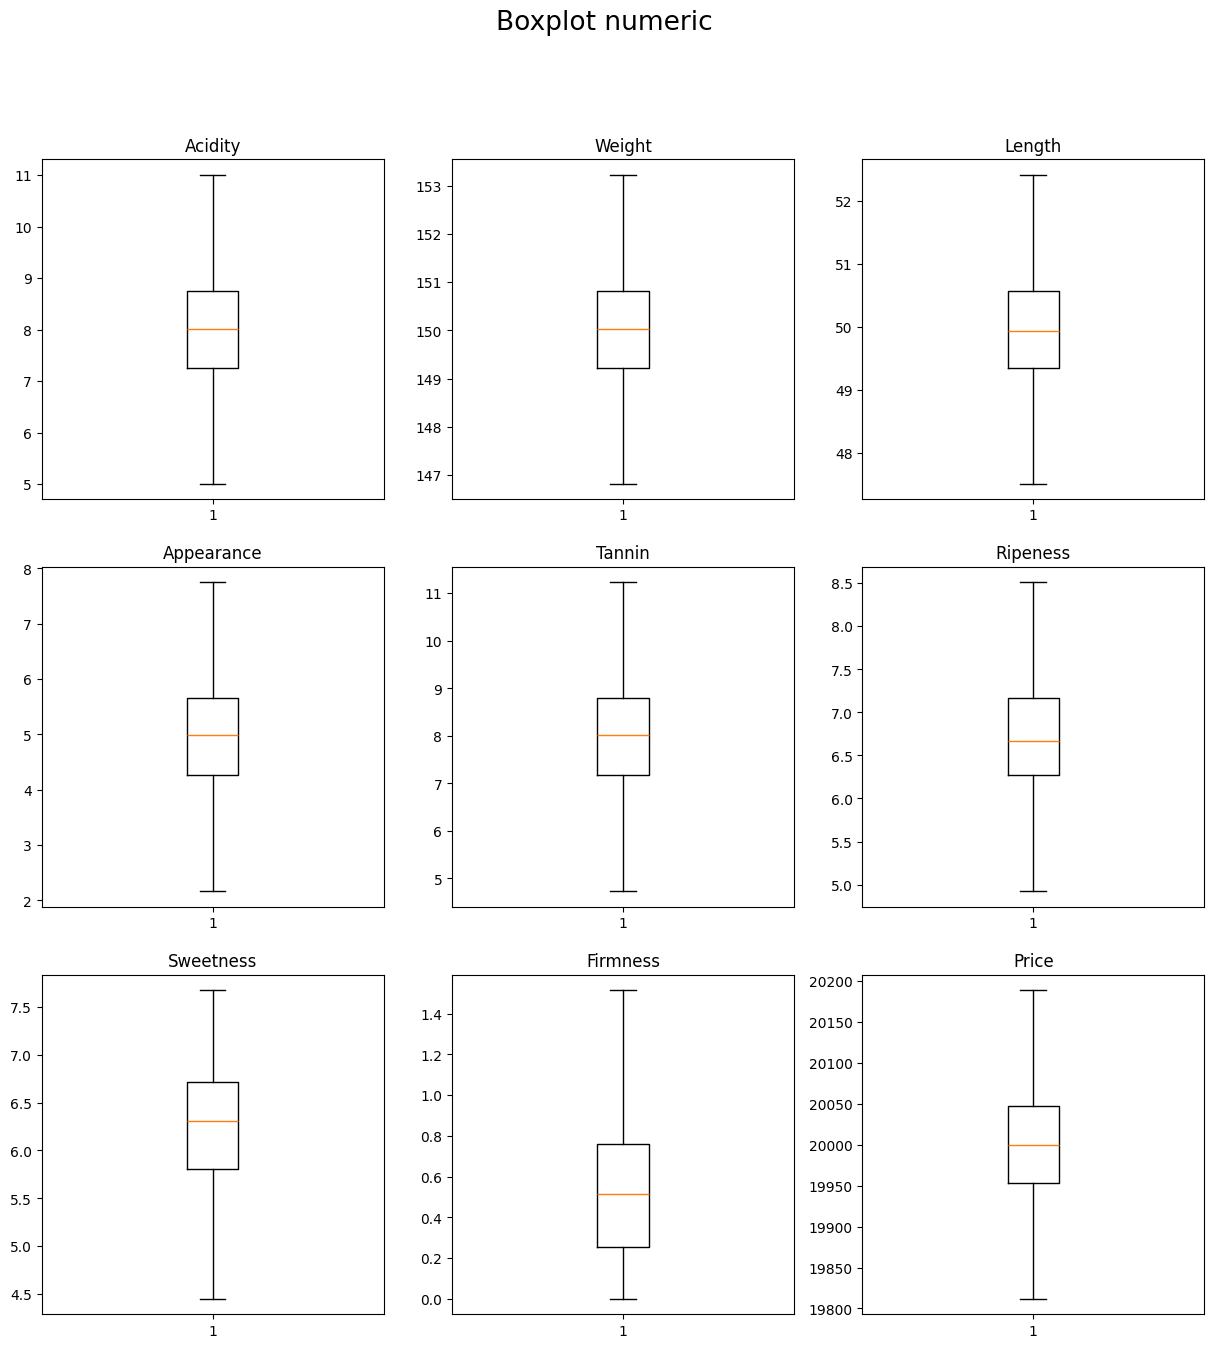

In [18]:
# Boxplot numeric
fig, ax = plt.subplots(3,3,figsize=(15,15))
fig.suptitle('Boxplot numeric', fontsize=19)
for i in range(3):
    for j in range(3):
        ax[i, j].boxplot(databaseNonOutlier[databaseNonOutlier.columns[i*3+j]])
        ax[i, j].set_title(databaseNonOutlier.columns[i*3+j])

plt.show()

#### Penjelasan Kondisi setiap kolom berdasarkan kedua plot diatas : (Data numerik)

Kolom Acidity, Weight, Appearance memiliki data yang relatif lebih tersebar dibanding kolom lainnya, karena panjang whiskers ketiga kolom tersebut relatif lebih panjang dibanding kolom Length, Tannin, Ripeness, Sweetness, Firmness, dan Price.

Berdasarkan histogram (dengan melihat bar tertinggi), modus dari kolom Acidity sekitar 7.8, modus dari kolom Weight sekitar 149.7, modus dari kolom Length sekitar 49.7, modus dari kolom Appearance sekitar 5.2, modus dari kolom Tannin sekitar 8.2, modus dari kolom Ripeness sekitar 6.6, modus dari kolom Sweetness sekitar 6.7, modus dari kolom Firmness sekitar 0.7, dan modus dari kolom Price sekitar 20000.

Berdasarkan boxplot, median dari kolom Acidity sekitar 8, median dari kolom Weight sekitar 150, median dari kolom Length sekitar 50, median dari kolom Appearance sekitar 5, median dari kolom Tannin sekitar 8, median dari kolom Ripeness sekitar 6.6, median dari kolom Sweetness sekitar 6.3, median dari kolom Firmness sekitar 0.5, dan median dari kolom Price sekitar 20000.

Berdasarkan histogram, kolom Acidity, Weight, dan Appearance memiliki skewness yang cukup simetris. Sementara kolom Length, Sweetness, dan Price negatively skewed, dan kolom Tannin, Ripeness, dan Firmness positively skewed.

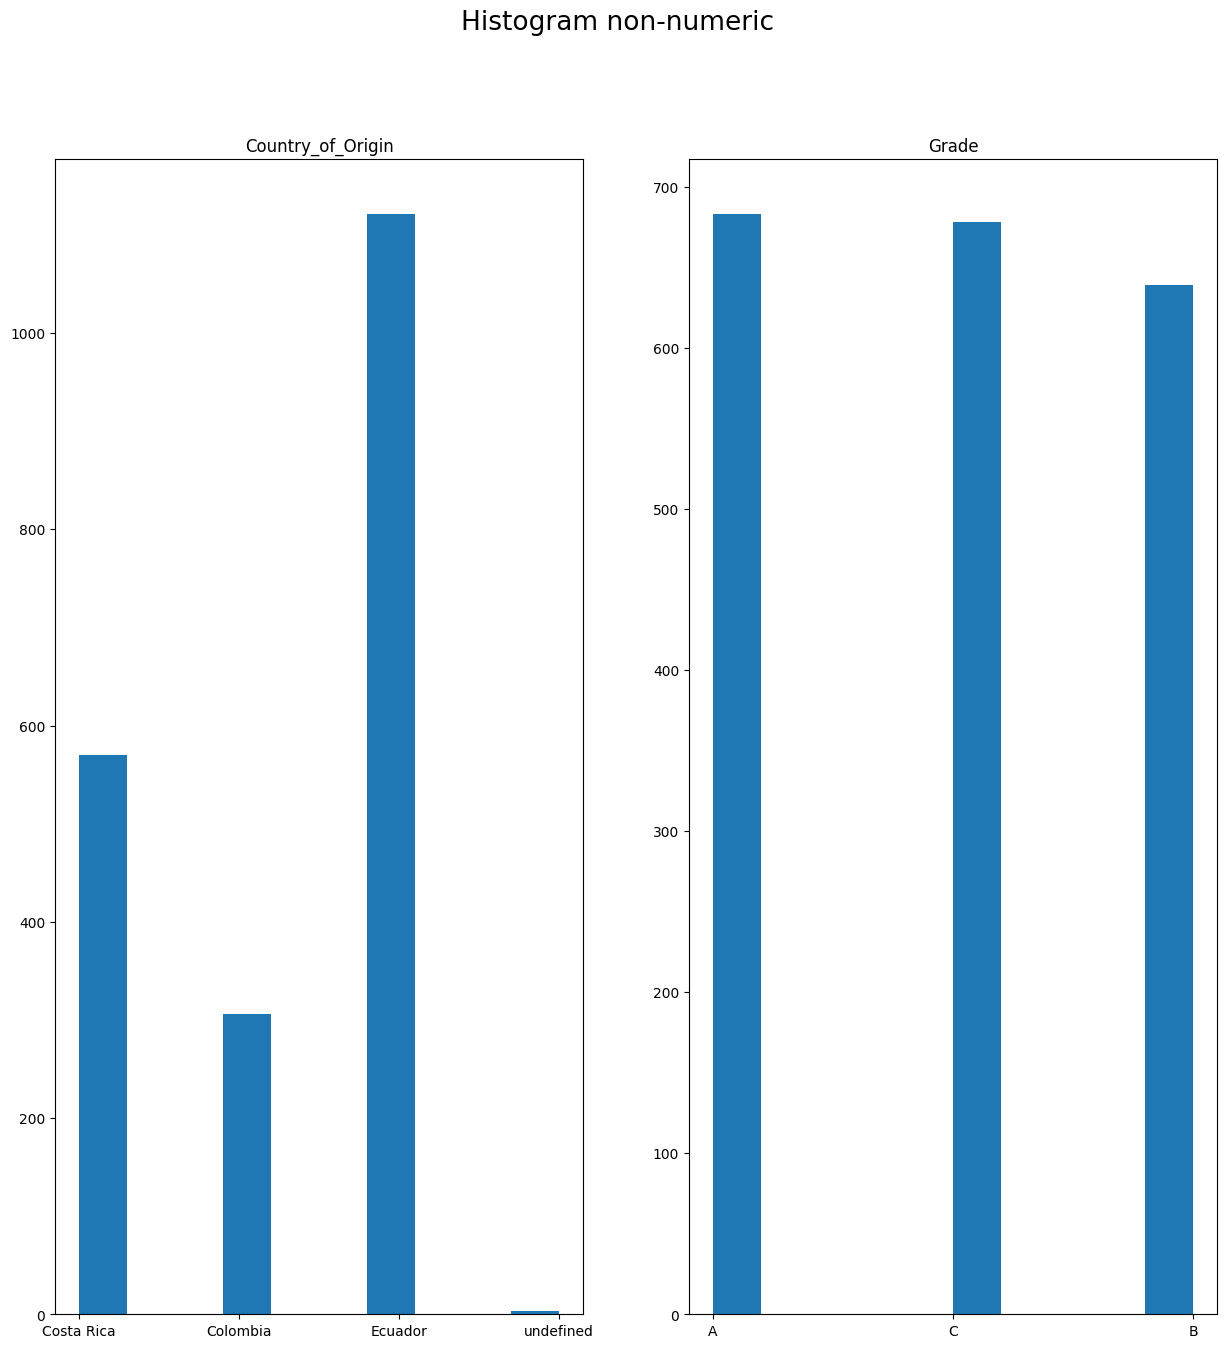

In [84]:
fig, ax = plt.subplots(1,2,figsize=(15,15))
fig.suptitle('Histogram non-numeric', fontsize=19)
for j in range(2):
    ax[j].hist(databasestring[databasestring.columns[j]])
    ax[j].set_title(databasestring.columns[j])

plt.show()

#### Penjelasan Kondisi setiap kolom berdasarkan plot diatas : (Data String)

Berdasarkan bar tertinggi pada histogram di atas, kolom Country_of_Origin memiliki modus "Ecuador", dan kolom Grade memiliki modus "A". Selain itu, kolom Country_of_Origin negatively skewed dan kolom Grade positively skewed.

# 4. Normality Test

Untuk menentukan apakah sebuah kolom numerik tersebut terdistribusi secara normal, kita gunakan metode Normality Test.

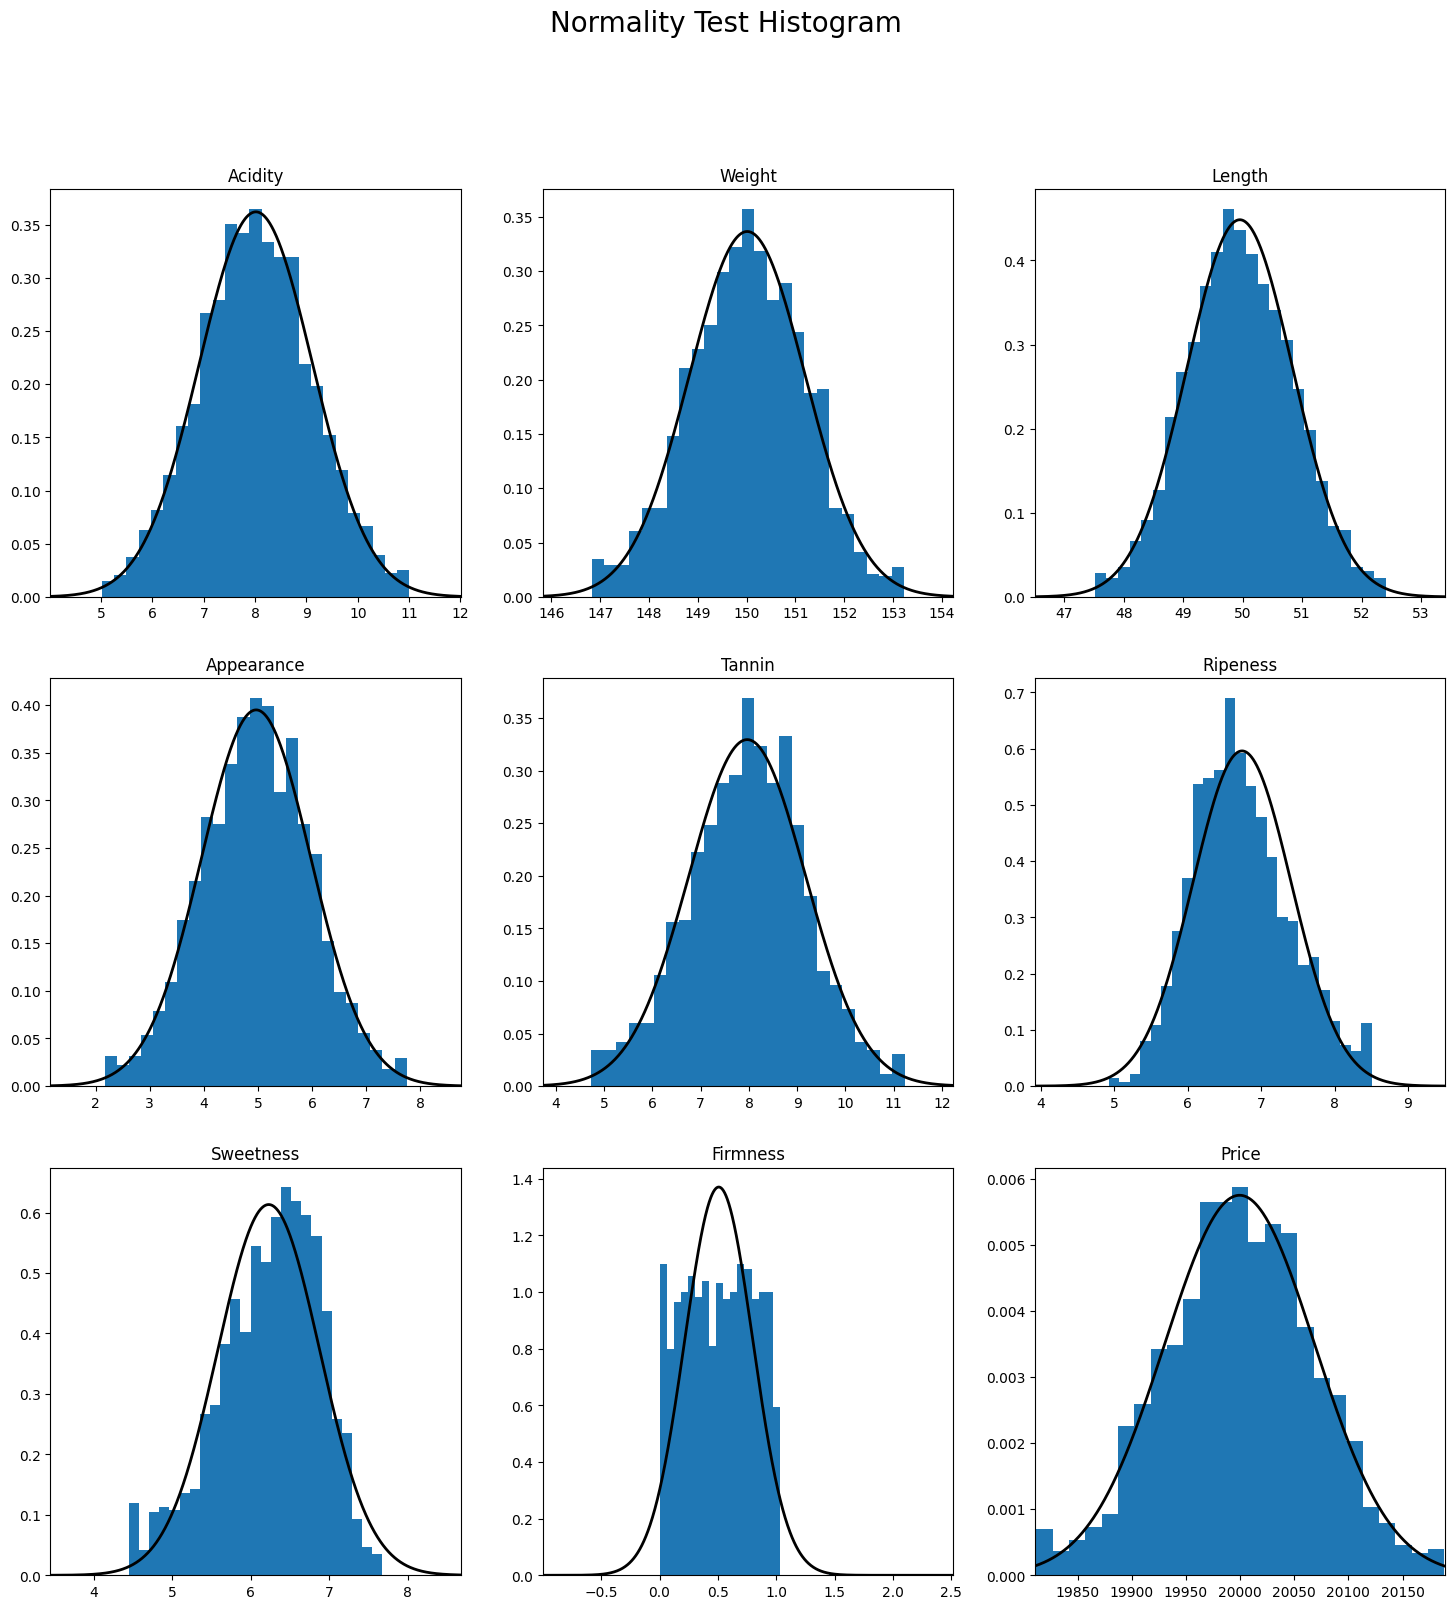

In [19]:
fig, ax = plt.subplots(3,3,figsize=(18,18))
fig.suptitle('Normality Test Histogram', fontsize=20)

for i in range(3):
    for j in range(3):
        
        dataNorm = databaseNonOutlier[databaseNonOutlier.columns[i*3+j]]
        a, std = scipy.stats.norm.fit(dataNorm)
        
        minval = np.min(dataNorm)-1
        maxval = np.max(dataNorm)+1

        ax[i, j].hist(dataNorm, bins=25, density=True)

        ax[i, j].set_xlim(minval, maxval)

        x = np.linspace(minval, maxval, 1000)
        pl = scipy.stats.norm.pdf(x, a, std)
        ax[i, j].plot(x, pl, 'k', linewidth=2)
        ax[i, j].set_title(databaseNonOutlier.columns[i*3+j])

plt.show()

Berdasarkan data di atas, kolom Acidity, Weight, Length, Appearance, dan Price terdistribusi secara normal (dilihat dari bentuk Bell's Curve). Sedangkan kolom Tannin yang positively skewed, Ripeness yang negatively skewed, Sweetness yang negatively skewed, dan Firmness yang positively skewed tidak terdistribusi secara normal.

# 5. Hipotesis 1 sampel

Untuk menjawab beberapa hipotesis, pertama-tama akan dilakukan analisis menggunakan satu sampel.

#### a. Rata-rata nilai Acidity di atas 6

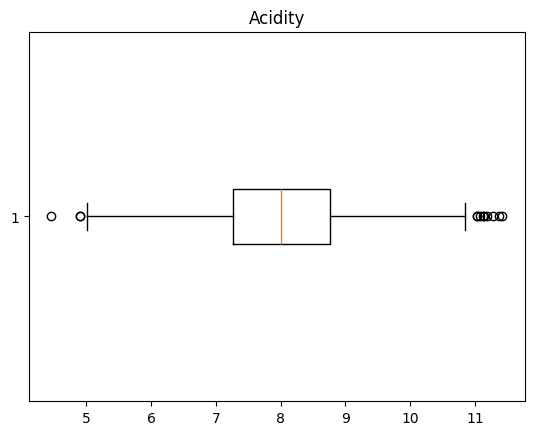

Rata-rata: 8.014829628574718
Standar deviasi: 1.1055048384965227


In [86]:
plt.boxplot(databasenya['Acidity'], vert = False)
plt.title('Acidity')
plt.show()
mean = np.mean(databasenya['Acidity'])
std = np.std(databasenya['Acidity'])
print(f"Rata-rata: {mean}")
print(f"Standar deviasi: {std}")

#### Langkah Testing:
1. $H_0$ : $\mu = 6$ 
2. $H_1$ : $\mu > 6$
3. $\alpha = 0.05$
4. Untuk uji mean one-tailed dengan standar deviasi populasi tidak diketahui, critical region ada di $t > 1.646$ dengan degrees of freedom v = 2000

In [87]:
n = databasenya.shape[0]
df = n -1
mu0 = 6
t = (mean - mu0) / (std/np.sqrt(n))
print(f"t = {t}")

p = 1 - scipy.stats.t.cdf(t, df)
print(f"P (t > {t}) = {p}")

t = 81.50658153067675
P (t > 81.50658153067675) = 0.0


5. t score:
$$t = \frac{\bar{x} - \mu_0}{s/\sqrt{n}}   $$
$$t = \frac{8.014829628574718 - 6}{1.1055048384965227/\sqrt{2000}} = 81.50658153067675  $$
dengan p-value $$ P = P(t > 81.50658153067675) = 1 - P(t < 81.50658153067675)  = 1 - 1 = 0 < 0.05$$
6. Berdasarkan uji tersebut, $H_0$ dapat ditolak. Kesimpulannya, nilai rata-rata Acidity di atas 6

#### b. Rata-rata berat tidak sama dengan 150 gram

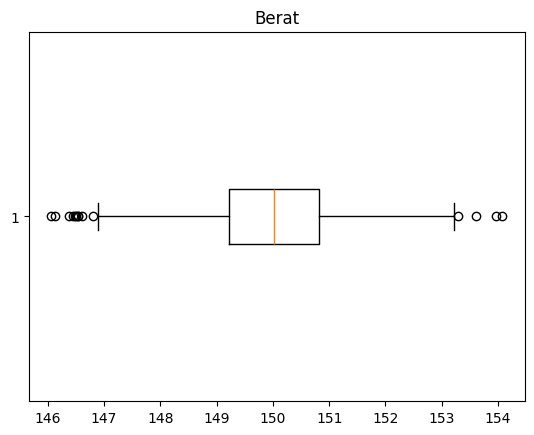

Rata-rata: 150.01154884061205
Standar deviasi: 1.194681336922938


In [88]:
plt.boxplot(databasenya['Weight'], vert = False)
plt.title('Berat')
plt.show()
mean = np.mean(databasenya['Weight'])
std = np.std(databasenya['Weight'])
print(f"Rata-rata: {mean}")
print(f"Standar deviasi: {std}")

#### Langkah Testing:
1. $H_0$ : $\mu = 150$ 
2. $H_1$ : $\mu \neq 150$
3. $\alpha = 0.05$
4. Untuk uji mean two-tailed dengan standar deviasi populasi tidak diketahui, critical region ada di $t > 1.962$ dengan degrees of freedom v = 2000

In [89]:
n = databasenya.shape[0]
df = n - 1
mu0 = 150
t = (mean - mu0) / (std/np.sqrt(n))
print(f"t = {t}")

p = 1 - scipy.stats.t.cdf(t, df)
print(f"P (t < {-t}) + P (t > {t}) = {2 * p}")

t = 0.43231599710711827
P (t < -0.43231599710711827) + P (t > 0.43231599710711827) = 0.6655583920462589


5. t score:
$$t = \frac{\bar{x} - \mu_0}{s/\sqrt{n}}   $$
$$t = \frac{150.01154884061205 - 150}{1.194681336922938/\sqrt{2000}} = 0.43231599710711827  $$
dengan p-value $$ P = P(t < -0.43231599710711827) + P(t > 0.43231599710711827) = 2(1 - P(t < 0.43231599710711827))  = 2(1 - 0.6672208039768706) = 0.6655583920462589 > 0.05$$
6. Berdasarkan uji tersebut, $H_0$ tidak dapat ditolak. Kesimpulannya, nilai rata-rata berat sama dengan 150

#### c. Rata-rata panjang buah pisang 10 baris terakhir tidak sama dengan 49

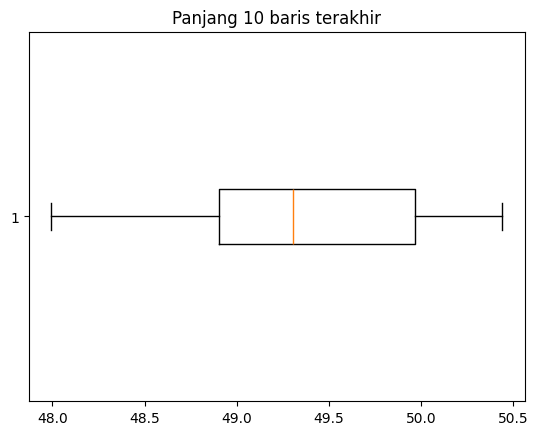

Rata-rata: 49.32726280603568
Standar deviasi: 0.7632913606944299


In [90]:
plt.boxplot(databasenya['Length'].tail(10), vert = False)
plt.title('Panjang 10 baris terakhir')
plt.show()
mean = np.mean(databasenya['Length'].tail(10))
std = np.std(databasenya['Length'].tail(10))
print(f"Rata-rata: {mean}")
print(f"Standar deviasi: {std}")

#### Langkah Testing:
1. $H_0$ : $\mu = 49$ 
2. $H_1$ : $\mu \neq 49$
3. $\alpha = 0.05$
4. Untuk uji mean one-tailed dengan standar deviasi populasi tidak diketahui, critical region ada di $t > 1.833$ dengan degrees of freedom v = 9

In [91]:
n = 10
df = n - 1
mu0 = 49
t = (mean - mu0) / (std/np.sqrt(n))
print(f"t = {t}")

p = 1 - scipy.stats.t.cdf(t, df)
print(f"P (t < {-t}) + P (t > {t}) = {2 * p}")

t = 1.355833321091315
P (t < -1.355833321091315) + P (t > 1.355833321091315) = 0.20819233570600892


5. t score:
$$t = \frac{\bar{x} - \mu_0}{s/\sqrt{n}}   $$
$$t = \frac{49.32726280603568 - 49}{0.7632913606944299/\sqrt{49}} = 1.355833321091315  $$
dengan p-value $$ P = P (t < -1.355833321091315) + P(t > 1.355833321091315) = 2(1 - P(t < 1.355833321091315))  = 2(1 - 0.8959038321469955) = 0.20819233570600892 > 0.05$$
6. Berdasarkan uji tersebut, $H_0$ tidak dapat ditolak. Kesimpulannya, nilai rata-rata panjang 10 baris terakhir sama dengan 49

#### d. Proporsi nilai Tannin yang lebih besar dari 8 tidak sama dengan 55% dari total dataset

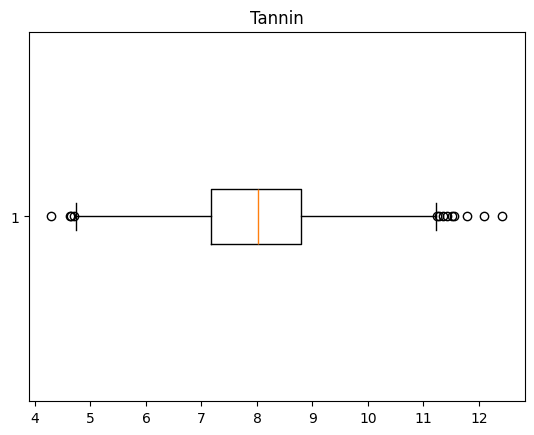

Jumlah tannin > 8: 1013


In [92]:
plt.boxplot(databasenya['Tannin'], vert = False)
plt.title('Tannin')
plt.show()
amount = (databasenya['Tannin'] > 8).sum()
print(f"Jumlah tannin > 8: {amount}")

In [93]:
n = databasenya.shape[0]
phat = amount / n
zscore = (phat - 0.55) / (np.sqrt(0.55 * (1 - 0.55) / n))
print(f"phat: {phat}")
print(f"Z = {zscore}")

phat: 0.5065
Z = -3.9103592022868128


#### Langkah Testing
1. $H_0$ : $p = 0.55$ 
2. $H_1$ : $p \neq 0.55$
3. $\alpha = 0.05$
4. Untuk uji proporsi two-tailed dengan aproksimasi normal untuk binomial, critical region ada di $z < -1.960$ atau $z > 1.960$ dengan $\hat{p} = 1013/2000 = 0.5065$ 

In [94]:
p = 1 - scipy.stats.norm.cdf(-zscore)
print(f"P (z < {zscore}) + P (z > {-zscore}) = {2 * p}")

P (z < -3.9103592022868128) + P (z > 3.9103592022868128) = 9.215896806336055e-05


5. z score:
$$z = \frac{\hat{p} - p_0}{\sqrt{\frac{p_0(1-p_0)}{n}}}   $$
$$z = \frac{0.5065 - 0.55}{\sqrt{\frac{0.55(0.45)}{2000}}} = -3.9103592022868128  $$
dengan p-value $$ P = P(z < -3.9103592022868128) + P(z > 3.9103592022868128) = 2(1 - P(z < 3.9103592022868128)) = 9.215896806336055 \times 10^{-5} < 0.05$$
6. Berdasarkan uji tersebut, $H_0$ dapat ditolak. Kesimpulannya, proporsi nilai tannin yang lebih besar dari 8, adalah tidak sama dengan 55%

# 6. Hipotesis 2 sampel

Untuk menjawab beberapa hipotesis, selanjutnya akan dilakukan analisis menggunakan dua sampel.

#### a. Rata-rata acidity bagian awal dan bagian akhir bernilai sama

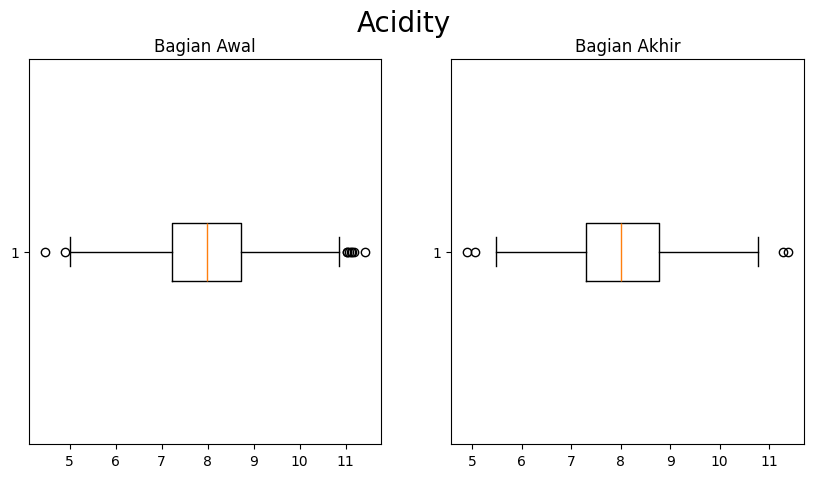

In [95]:
lower_half = databasenya['Acidity'][:1000]
upper_half = databasenya['Acidity'][1000:]
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Acidity', fontsize=20)
ax[0].boxplot(lower_half, vert=False)
ax[0].set_title('Bagian Awal')
ax[1].boxplot(upper_half, vert=False)
ax[1].set_title('Bagian Akhir')
plt.show()

In [96]:
print(f"Rata-rata 1: {np.mean(lower_half)}")
print(f"Standar deviasi 1: {np.std(lower_half)}")
print(f"Rata-rata 2: {np.mean(upper_half)}")
print(f"Standar deviasi 2: {np.std(upper_half)}")
n = databasenya.shape[0] / 2
zscore = (np.mean(lower_half) - np.mean(upper_half)) / ( np.sqrt((np.std(lower_half) ** 2 / n)+(np.std(upper_half) ** 2 / n)))
print(f"z = {zscore}")
print(f"P(z < {zscore}) : {scipy.stats.norm.cdf(zscore)}")
print(f"P(z < {-1*zscore}) : {scipy.stats.norm.cdf(-1*zscore)}")

Rata-rata 1: 7.983667364821076
Standar deviasi 1: 1.1177709764846848
Rata-rata 2: 8.04599189232836
Standar deviasi 2: 1.0922123267215111
z = -1.2611186789700484
P(z < -1.2611186789700484) : 0.1036330458756683
P(z < 1.2611186789700484) : 0.8963669541243318


#### Langkah Testing
1. $H_0$ : $\mu_1 - \mu_2 = 0$ 
2. $H_1$ : $\mu_1 - \mu_2 \neq 0$
3. $\alpha = 0.05$
4. Untuk uji mean two-tailed dengan standar deviasi populasi diketahui, critical region ada di $z < -1.962$ atau $z > 1.962$

In [97]:
p = 1 - scipy.stats.norm.cdf(-zscore)
print(f"P (z < {zscore}) + P (z > {-zscore}) = {2 * p}")

P (z < -1.2611186789700484) + P (z > 1.2611186789700484) = 0.20726609175133648


5. z score:
$$z = \frac{(\bar{x_1} - \bar{x_2}) - d_0}{\sqrt{\frac{σ_1^2}{n_1}+\frac{σ_2^2}{n_2}}}   $$
$$z = \frac{(7.983667364821076 - 8.04599189232836) - 0}{\sqrt{\frac{1.1177709764846848^2}{1000}+\frac{1.0922123267215111^2}{1000}}} = -1.2611186789700484   $$
dengan p-value $$ P = P(z < -1.2611186789700484) + P(z > 1.2611186789700484) = 2(1 - P(z > 1.2611186789700484)) = 0.20726609175133648 > 0.05$$ 
6. Berdasarkan uji tersebut,  $H_0$ tidak dapat ditolak. Kesimpulannya, rata-rata kedua bagian tersebut sama.

#### b. Rata-rata appearance bagian awal lebih besar dari bagian akhir sebesar 0.1

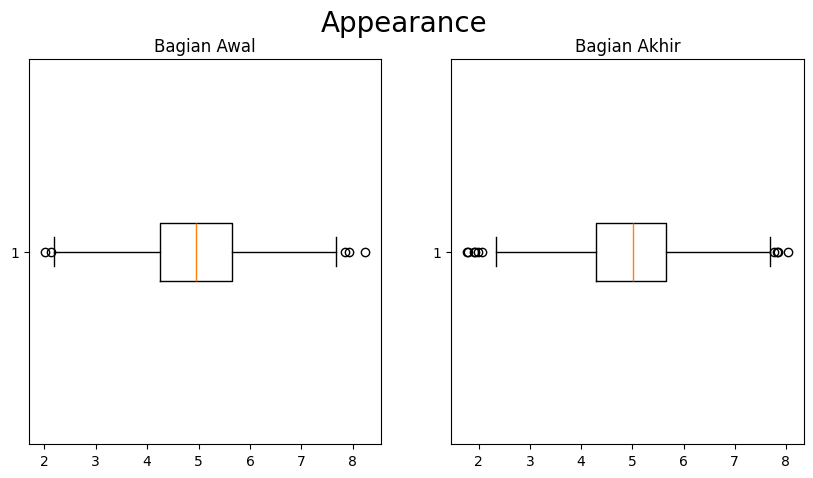

In [98]:
lower_half = databasenya['Appearance'][:1000]
upper_half = databasenya['Appearance'][1000:]
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Appearance', fontsize=20)
ax[0].boxplot(lower_half, vert=False)
ax[0].set_title('Bagian Awal')
ax[1].boxplot(upper_half, vert=False)
ax[1].set_title('Bagian Akhir')
plt.show()

In [99]:
print(f"Rata-rata 1: {np.mean(lower_half)}")
print(f"Standar deviasi 1: {np.std(lower_half)}")
print(f"Rata-rata 2: {np.mean(upper_half)}")
print(f"Standar deviasi 2: {np.std(upper_half)}")
n = databasenya.shape[0] / 2
zscore = (np.mean(lower_half) - np.mean(upper_half) - 0.1) / ( np.sqrt((np.std(lower_half) ** 2 / n)+(np.std(upper_half) ** 2 / n)))
print(f"z = {zscore}")
print(f"P(z < {zscore}) : {scipy.stats.norm.cdf(zscore)}")
print(f"P(z < {-1*zscore}) : {scipy.stats.norm.cdf(-1*zscore)}")

Rata-rata 1: 4.964508762370737
Standar deviasi 1: 1.0146292790672113
Rata-rata 2: 4.966680927367332
Standar deviasi 2: 1.0145876157120381
z = -2.25174457082775
P(z < -2.25174457082775) : 0.012169209145881255
P(z < 2.25174457082775) : 0.9878307908541187


#### Langkah Testing
1. $H_0$ : $\mu_1 - \mu_2 = 0.1$ 
2. $H_1$ : $\mu_1 - \mu_2 \neq 0.1$
3. $\alpha = 0.05$
4. Untuk uji mean two-tailed dengan standar deviasi populasi diketahui, critical region ada di $z < -1.962$ atau $z > 1.962$

In [100]:
p = 1 - scipy.stats.norm.cdf(-zscore)
print(f"P (z < {zscore}) + P (z > {-zscore}) = {2 * p}")

P (z < -2.25174457082775) + P (z > 2.25174457082775) = 0.02433841829176253


5. z score:
$$z = \frac{(\bar{x_1} - \bar{x_2}) - d_0}{\sqrt{\frac{σ_1^2}{n_1}+\frac{σ_2^2}{n_2}}}   $$
$$z = \frac{(4.964508762370737 - 4.966680927367332) - 0.1}{\sqrt{\frac{1.0146292790672113^2}{1000}+\frac{1.0145876157120381^2}{1000}}} = -2.25174457082775   $$
dengan p-value $$ P = P(z < -2.25174457082775) + P(z > 2.25174457082775) = 2(1 - P(z > 2.25174457082775)) = 0.02433841829176253 < 0.05$$ 
6. Berdasarkan uji tersebut,  $H_0$ dapat ditolak. Kesimpulannya, rata-rata appearance bagian awal tidak bernilai lebih besar dari bagian akhir sebesar 0.1 unit.

#### c. Variansi panjang pisang bagian awal dan bagian akhir bernilai sama

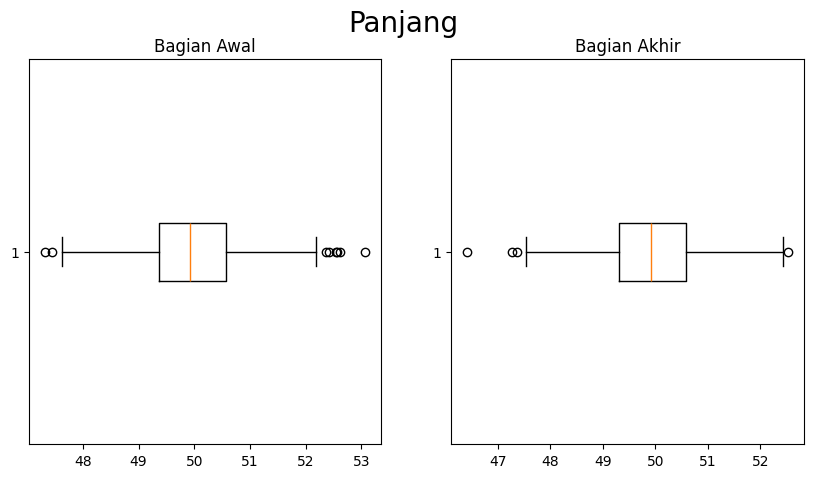

In [101]:
lower_half = databasenya['Length'][:1000]
upper_half = databasenya['Length'][1000:]
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Panjang', fontsize=20)
ax[0].boxplot(lower_half, vert=False)
ax[0].set_title('Bagian Awal')
ax[1].boxplot(upper_half, vert=False)
ax[1].set_title('Bagian Akhir')
plt.show()

In [102]:
lhvar = np.std(lower_half) ** 2
uhvar = np.std(upper_half) ** 2
fscore = max(lhvar, uhvar) / min(lhvar, uhvar)
alpha = 0.05
fscorethreshold = scipy.stats.f.ppf(1 - alpha / 2, 1000, 1000)
print("Variansi 1:", lhvar)
print("Variansi 2:", uhvar)
print("f-score:", fscore)
print("f-score critical:", fscorethreshold)
print(f"P(f < {-fscore}) + P(f > {fscore}): {2 * scipy.stats.f.cdf(fscore, 1000, 1000)}")

Variansi 1: 0.788284273839025
Variansi 2: 0.8112771216395865
f-score: 1.0291682183238084
f-score critical: 1.132049498795568
P(f < -1.0291682183238084) + P(f > 1.0291682183238084): 1.3505097925564873


#### Langkah Testing
1. $H_0$ : $\sigma_1^2 = \sigma_2^2$ 
2. $H_1$ : $\sigma_1^2 \neq \sigma_2^2$
3. $\alpha = 0.05$
4. Untuk uji proporsi two-tailed dengan aproksimasi normal untuk binomial, critical region ada di $f < 1.132049498795568$
5. f score:
$$f = \frac{s_1^2}{s_2^2}   $$
$$f = \frac{0.8112771216395865}{0.788284273839025}  = 1.0291682183238084 $$

dengan p-value $$ P = P(f < -1.0291682183238084) + P(f > 1.0291682183238084) = 2(1 - P(f < 1.0291682183238084)) = 1.3505097925564873 > 0.05$$
6. Berdasarkan uji tersebut, $H_0$ tidak dapat ditolak. Kesimpulannya, variansi bagian awal dan bagian akhir bernilai sama

#### d. Proporsi berat pisang yang lebih besar dari 150 pada bagian awal lebih besar dari bagian akhir

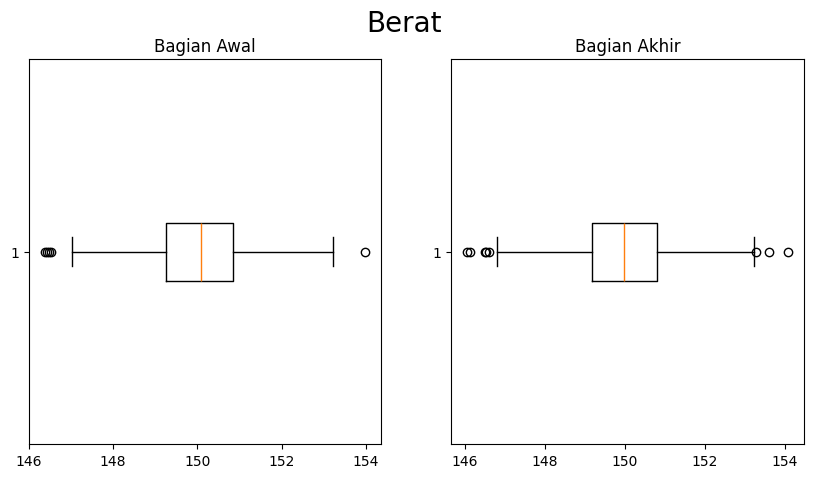

In [103]:
lower_half = databasenya['Weight'][:1000]
upper_half = databasenya['Weight'][1000:]
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Berat', fontsize=20)
ax[0].boxplot(lower_half, vert=False)
ax[0].set_title('Bagian Awal')
ax[1].boxplot(upper_half, vert=False)
ax[1].set_title('Bagian Akhir')
plt.show()

In [104]:
amount1 = (lower_half > 150).sum()
amount2 = (upper_half > 150).sum()
n1 = 1000
n2 = 1000
phat1 = amount1/n1
print(f"phat 1 : {phat1}")
phat2 = amount2 / n2
print(f"phat 2 : {phat2}")
p = (amount1 + amount2) / (n1 + n2)
print(f"p : {p}")
q = 1 - p
print(f"q : {q}")
zscore = (phat1 - phat2) / (np.sqrt(p * q * ((1 / n1) + (1 / n2))))
print(f"z-score: {zscore}")
print(f"P(z < {zscore}) : {scipy.stats.norm.cdf(zscore)}")

phat 1 : 0.524
phat 2 : 0.493
p : 0.5085
q : 0.49150000000000005
z-score: 1.3865625188118174
P(z < 1.3865625188118174) : 0.9172123979633402


#### Langkah testing
1. $H_0$ : $p_1 = p_2$ 
2. $H_1$ : $p_1 > p_2$
3. $\alpha = 0.05$
4. Uji proporsi one-tailed. <br>Critical Region ada di $z > 1.645$ 
5. z score:
$$z = \frac{\hat{P_1} - \hat{P_2}}{\sqrt{pq(\frac{1}{n_1}+\frac{1}{n_2})}}   $$
$$z = \frac{0.524 - 0.493}{\sqrt{0.5085(0.4915)(\frac{1}{1000}+\frac{1}{1000})}}= 1.3865625188118174 $$
dengan p-value $$ P = P(z < 1.3865625188118174) = 0.9172123979633402 > 0.05$$
6. Berdasarkan uji tersebut, $H_0$ tidak dapat ditolak. Kesimpulannya, proporsi berat pisang yang lebih dari 150 pada bagian awal bernilai sama dengan bagian akhir